# **Caso Machine Learning League of legends**

Hemos seleccionado un dataset de League of Legends para analizar los datos y explorar la posibilidad de aplicar modelos de machine learning con el fin de predecir resultados.

En cada partida de League of Legends, dos equipos de cinco jugadores (denominados equipo azul y equipo rojo) se enfrentan en un campo de batalla. El objetivo es destruir el Nexus enemigo, que se encuentra en la base del equipo contrario. Para alcanzar este objetivo, los jugadores deben navegar por tres carriles principales (top, mid, bot), así como por la jungla que conecta estas rutas. Cada jugador asume un rol específico, y el éxito del equipo depende de las decisiones estratégicas y la habilidad individual de los jugadores.

Los datos a utilizar corresponden a más de 25,000 partidas clasificatorias en el modo SOLO QUEUE dentro del rango de ELO Platino. Cada partida es única y está identificada por un gameId, lo que permite acceder a datos adicionales utilizando la API de Riot Games. Los datos incluyen características recopiladas en diferentes momentos del juego, desde los primeros 10 minutos hasta el final, proporcionando un total de más de 240,000 registros temporales.

El objetivo de este análisis es explorar las 59 características disponibles para el equipo azul, que incluyen métricas como asesinatos, muertes, oro, experiencia, nivel, entre otras. También se consideran valores booleanos categóricos que indican ciertas condiciones del juego. La variable objetivo hasWon permite abordar un problema de clasificación para predecir el resultado de la partida, mientras que el atributo gameDuration se puede utilizar para predecir la duración del juego.

Este análisis permitirá comprender mejor los factores que influyen en los resultados de las partidas y ofrecerá la oportunidad de realizar ingeniería de características para obtener insights más profundos. La riqueza de los datos abre la puerta a diversas aplicaciones, como la predicción de resultados de juegos o la optimización de estrategias dentro de League of Legends.

| Dato                         | Descripción                                              |
|------------------------------|----------------------------------------------------------|
| gameId                       | Identificador único de la partida.                       |
| gameDuration                 | Duración total de la partida en segundos.                |
| hasWon                       | Indica si el equipo ganó la partida (1) o no (0).        |
| frame                        | Momento específico de la partida, medido en intervalos de tiempo (por ejemplo, 10 minutos, 12 minutos, etc.). |
| goldDiff                     | Diferencia de oro entre los equipos en un momento dado.  |
| expDiff                      | Diferencia de experiencia entre los equipos.             |
| champLevelDiff               | Diferencia en los niveles de los campeones entre equipos.|
| isFirstTower                 | Indica si se destruyó la primera torre (1: sí, 0: no).   |
| isFirstBlood                 | Indica si se consiguió la primera sangre (1: sí, 0: no). |
| killedFireDrake              | Número de dragones de fuego que mató el equipo.          |
| killedWaterDrake             | Número de dragones de agua que mató el equipo.           |
| killedAirDrake               | Número de dragones de aire que mató el equipo.           |
| killedEarthDrake             | Número de dragones de tierra que mató el equipo.         |
| killedElderDrake             | Número de dragones ancianos que mató el equipo.          |
| lostFireDrake                | Número de dragones de fuego perdidos (matados por el enemigo). |
| lostWaterDrake               | Número de dragones de agua perdidos.                     |
| lostAirDrake                 | Número de dragones de aire perdidos.                     |
| lostEarthDrake               | Número de dragones de tierra perdidos.                   |
| lostElderDrake               | Número de dragones ancianos perdidos.                    |
| killedBaronNashor            | Número de veces que se mató al Barón Nashor.             |
| lostBaronNashor              | Número de veces que el enemigo mató al Barón Nashor.     |
| killedRiftHerald             | Número de veces que se mató al Heraldo de la Grieta.     |
| lostRiftHerald               | Número de veces que el enemigo mató al Heraldo de la Grieta. |
| destroyedTopInhibitor        | Número de inhibidores superiores destruidos.             |
| destroyedMidInhibitor        | Número de inhibidores centrales destruidos.              |
| destroyedBotInhibitor        | Número de inhibidores inferiores destruidos.             |
| lostTopInhibitor             | Número de inhibidores superiores perdidos.               |
| lostMidInhibitor             | Número de inhibidores centrales perdidos.                |
| lostBotInhibitor             | Número de inhibidores inferiores perdidos.               |
| destroyedTopNexusTurret      | Número de torretas superiores del nexo destruidas.       |
| destroyedMidNexusTurret      | Número de torretas centrales del nexo destruidas.        |
| destroyedBotNexusTurret      | Número de torretas inferiores del nexo destruidas.       |
| lostTopNexusTurret           | Número de torretas superiores del nexo perdidas.         |
| lostMidNexusTurret           | Número de torretas centrales del nexo perdidas.          |
| lostBotNexusTurret           | Número de torretas inferiores del nexo perdidas.         |
| destroyedTopBaseTurret       | Número de torretas superiores de la base destruidas.     |
| destroyedMidBaseTurret       | Número de torretas centrales de la base destruidas.      |
| destroyedBotBaseTurret       | Número de torretas inferiores de la base destruidas.     |
| lostTopBaseTurret            | Número de torretas superiores de la base perdidas.       |
| lostMidBaseTurret            | Número de torretas centrales de la base perdidas.        |
| lostBotBaseTurret            | Número de torretas inferiores de la base perdidas.       |
| destroyedTopInnerTurret      | Número de torretas interiores superiores destruidas.     |
| destroyedMidInnerTurret      | Número de torretas interiores centrales destruidas.      |
| destroyedBotInnerTurret      | Número de torretas interiores inferiores destruidas.     |
| lostTopInnerTurret           | Número de torretas interiores superiores perdidas.       |
| lostMidInnerTurret           | Número de torretas interiores centrales perdidas.        |
| lostBotInnerTurret           | Número de torretas interiores inferiores perdidas.       |
| destroyedTopOuterTurret      | Número de torretas exteriores superiores destruidas.     |
| destroyedMidOuterTurret      | Número de torretas exteriores centrales destruidas.      |
| destroyedBotOuterTurret      | Número de torretas exteriores inferiores destruidas.     |
| lostTopOuterTurret           | Número de torretas exteriores superiores perdidas.       |
| lostMidOuterTurret           | Número de torretas exteriores centrales perdidas.        |
| lostBotOuterTurret           | Número de torretas exteriores inferiores perdidas.       |
| kills                        | Número de asesinatos realizados por el equipo o jugador. |
| deaths                       | Número de veces que el equipo o jugador murió.           |
| assists                      | Número de asistencias realizadas por el equipo o jugador.|
| wardsPlaced                  | Número de centinelas colocados.                          |
| wardsDestroyed               | Número de centinelas destruidos.                         |
| wardsLost                    | Número de centinelas perdidos.                           |


## **Fase 1: Business Understanding**

In [6]:
import pandas as pd
import arff
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Funcion para cargar el dataset
def load_arff_dataset(filepath: str) -> pd.DataFrame:
    with open(filepath, 'r') as f:
        arff_data = arff.load(f)
    
    df = pd.DataFrame(arff_data['data'], columns=[attr[0] for attr in arff_data['attributes']])
    
    return df

arff_file_path = '../data/01_raw/dataset'

df = load_arff_dataset(arff_file_path)

In [4]:
# Primeras 10 filas
df.head(10)

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
1,4546233126,1443000,1,12,-1306,-925,-0.6,0,1,0,...,0,0,0,0,6,11,6,28,4,6
2,4546233126,1443000,1,14,2115,2578,0.4,1,1,0,...,0,0,0,0,10,11,12,35,4,6
3,4546233126,1443000,1,16,1195,2134,0.4,1,1,0,...,0,0,1,0,10,12,12,45,6,10
4,4546233126,1443000,1,18,2931,4382,0.6,1,1,1,...,0,0,1,0,13,13,16,49,7,12
5,4546233126,1443000,1,20,6127,7606,0.8,1,1,1,...,1,0,1,0,20,14,28,63,9,13
6,4546233126,1443000,1,22,7428,7842,1.4,1,1,1,...,1,0,1,0,23,15,33,75,10,13
7,4546233126,1443000,1,24,9426,11980,1.8,1,1,2,...,1,0,1,0,26,15,36,85,11,14
8,4438212663,1241000,1,10,898,934,0.0,0,1,0,...,0,0,0,0,6,6,7,15,4,1
9,4438212663,1241000,1,12,1263,1566,0.4,0,1,0,...,0,0,0,0,7,7,7,20,5,4


In [9]:
# Ultimas 10 filas
df.tail(10)

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
242562,4402156483,1774000,0,20,1440,1464,0.4,1,1,0,...,0,0,1,0,23,17,37,48,11,11
242563,4402156483,1774000,0,22,1291,634,0.2,1,1,0,...,0,0,1,0,25,20,41,54,11,12
242564,4402156483,1774000,0,24,-1321,-2549,-0.4,1,1,0,...,0,0,1,1,29,28,45,57,12,12
242565,4402156483,1774000,0,26,-4062,-5239,-0.8,1,1,1,...,0,0,1,1,30,32,47,67,14,15
242566,4402156483,1774000,0,28,-5640,-9016,-1.0,1,1,1,...,0,0,1,1,33,36,50,74,15,16
242567,4402156483,1774000,0,30,-8523,-13498,-1.6,1,1,1,...,0,0,1,1,33,41,50,80,18,17
242568,4379826739,1013000,0,10,-271,-1243,-0.2,0,1,0,...,0,0,0,0,6,5,6,18,1,2
242569,4379826739,1013000,0,12,-2013,-3493,-0.8,0,1,0,...,0,0,0,0,7,8,6,23,1,5
242570,4379826739,1013000,0,14,-2388,-4543,-0.8,0,1,0,...,0,0,0,0,10,13,9,27,5,6
242571,4379826739,1013000,0,16,-5601,-7595,-1.2,0,1,0,...,0,0,0,0,11,17,10,31,6,10


In [4]:
# Columna y tipo de dato
columnas = df.columns
for columna in columnas:
    print(f'{columna} es de tipo {df[columna].dtype}')

gameId es de tipo int64
gameDuration es de tipo int64
hasWon es de tipo int64
frame es de tipo int64
goldDiff es de tipo int64
expDiff es de tipo int64
champLevelDiff es de tipo float64
isFirstTower es de tipo int64
isFirstBlood es de tipo int64
killedFireDrake es de tipo int64
killedWaterDrake es de tipo int64
killedAirDrake es de tipo int64
killedEarthDrake es de tipo int64
killedElderDrake es de tipo int64
lostFireDrake es de tipo int64
lostWaterDrake es de tipo int64
lostAirDrake es de tipo int64
lostEarthDrake es de tipo int64
lostElderDrake es de tipo int64
killedBaronNashor es de tipo int64
lostBaronNashor es de tipo int64
killedRiftHerald es de tipo int64
lostRiftHerald es de tipo int64
destroyedTopInhibitor es de tipo int64
destroyedMidInhibitor es de tipo int64
destroyedBotInhibitor es de tipo int64
lostTopInhibitor es de tipo int64
lostMidInhibitor es de tipo int64
lostBotInhibitor es de tipo int64
destroyedTopNexusTurret es de tipo int64
destroyedMidNexusTurret es de tipo i

In [4]:
num_filas = df.shape[0]
print(f'El dataset tiene {num_filas} filas.')

El dataset tiene 242572 filas.


 # Hipótesis

De acuerdo con los datos que se pueden apreciar, se podría trabajar bajo las siguientes hipótesis:

* ¿Cómo afectan los objetivos neutrales (Dragones, Barón y Heraldo) a la victoria del equipo?
* Andrus
* Ricardo


## **Fase 2: Data Understanding**

### Verificación de datos nulos

In [5]:
df.isnull().sum()


gameId                     0
gameDuration               0
hasWon                     0
frame                      0
goldDiff                   0
expDiff                    0
champLevelDiff             0
isFirstTower               0
isFirstBlood               0
killedFireDrake            0
killedWaterDrake           0
killedAirDrake             0
killedEarthDrake           0
killedElderDrake           0
lostFireDrake              0
lostWaterDrake             0
lostAirDrake               0
lostEarthDrake             0
lostElderDrake             0
killedBaronNashor          0
lostBaronNashor            0
killedRiftHerald           0
lostRiftHerald             0
destroyedTopInhibitor      0
destroyedMidInhibitor      0
destroyedBotInhibitor      0
lostTopInhibitor           0
lostMidInhibitor           0
lostBotInhibitor           0
destroyedTopNexusTurret    0
destroyedMidNexusTurret    0
destroyedBotNexusTurret    0
lostTopNexusTurret         0
lostMidNexusTurret         0
lostBotNexusT

Podemos notar que dentro del dataset no existen valores nulos.

In [3]:
df.nunique()


gameId                     24912
gameDuration                2074
hasWon                         2
frame                         24
goldDiff                   28629
expDiff                    28949
champLevelDiff               123
isFirstTower                   2
isFirstBlood                   2
killedFireDrake                5
killedWaterDrake               5
killedAirDrake                 5
killedEarthDrake               5
killedElderDrake               4
lostFireDrake                  5
lostWaterDrake                 5
lostAirDrake                   5
lostEarthDrake                 5
lostElderDrake                 4
killedBaronNashor              5
lostBaronNashor                5
killedRiftHerald               3
lostRiftHerald                 3
destroyedTopInhibitor          4
destroyedMidInhibitor          4
destroyedBotInhibitor          5
lostTopInhibitor               4
lostMidInhibitor               4
lostBotInhibitor               5
destroyedTopNexusTurret        2
destroyed

In [7]:
# Lista para almacenar los nombres de las columnas con números negativos
columnas_con_negativos = []

# Iterar sobre cada columna y verificar si contiene números negativos
for columna in df.columns:
    if (df[columna] < 0).any():
        columnas_con_negativos.append(columna)

print("Columnas con números negativos:", columnas_con_negativos)

Columnas con números negativos: ['goldDiff', 'expDiff', 'champLevelDiff']


Las columnas que contienen números negativos están correctas, ya que dentro del juego es posible que existan diferencias negativas tanto en oro como en experiencia o en el nivel del personaje.

### Medidas de Posición

In [5]:
df.describe()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
count,2.425720e+05,2.425720e+05,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,...,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000
mean,4.501480e+09,1.785494e+06,0.498128,19.811264,-11.413811,-215.019351,-0.026517,0.617709,0.998627,0.295908,...,0.369997,0.376795,0.368822,0.355243,16.391381,16.342220,21.166029,56.833530,10.487031,10.263077
std,5.331693e+07,3.761901e+05,0.499998,7.197339,5438.051920,5261.880802,0.772366,0.485948,0.037026,0.509759,...,0.482805,0.484584,0.482487,0.478588,9.660237,9.697602,16.055645,58.734777,8.713549,8.736323
min,4.357970e+09,5.490000e+05,0.000000,10.000000,-21578.000000,-32484.000000,-4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,4.463051e+09,1.532000e+06,0.000000,14.000000,-3420.250000,-3148.000000,-0.600000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,25.000000,4.000000,4.000000
50%,4.529395e+09,1.774000e+06,0.000000,18.000000,24.000000,-123.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.000000,15.000000,17.000000,40.000000,8.000000,8.000000
75%,4.543718e+09,2.025000e+06,1.000000,24.000000,3409.000000,2772.000000,0.400000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,22.000000,22.000000,30.000000,63.000000,15.000000,14.000000
max,4.547671e+09,3.428000e+06,1.000000,56.000000,23432.000000,43304.000000,3.800000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,69.000000,72.000000,137.000000,1014.000000,115.000000,107.000000


In [6]:
for dato in df.columns:
    media = df[dato].mean()
    moda = df[dato].mode()[0] if not df[dato].mode().empty else 'No hay moda'
    mediana = df[dato].median()
    desviacion = df[dato].std()
    print(f"Columna: {dato}")
    print(f" - Media: {media}")
    print(f" - Moda: {moda}")
    print(f" - Mediana: {mediana}")
    print(f" - Desviación Estándar: {desviacion}\n")


Columna: gameId
 - Media: 4501479546.200077
 - Moda: 4361896408
 - Mediana: 4529395251.0
 - Desviación Estándar: 53316927.63205334

Columna: gameDuration
 - Media: 1785493.8945962435
 - Moda: 1775000
 - Mediana: 1774000.0
 - Desviación Estándar: 376190.06291678606

Columna: hasWon
 - Media: 0.4981283907458404
 - Moda: 0
 - Mediana: 0.0
 - Desviación Estándar: 0.4999975276843313

Columna: frame
 - Media: 19.811264284418648
 - Moda: 10
 - Mediana: 18.0
 - Desviación Estándar: 7.197338964616284

Columna: goldDiff
 - Media: -11.413811157099747
 - Moda: 647
 - Mediana: 24.0
 - Desviación Estándar: 5438.051920127789

Columna: expDiff
 - Media: -215.01935095559256
 - Moda: -589
 - Mediana: -123.0
 - Desviación Estándar: 5261.880802086872

Columna: champLevelDiff
 - Media: -0.0265166630938443
 - Moda: 0.0
 - Mediana: 0.0
 - Desviación Estándar: 0.7723658247149056

Columna: isFirstTower
 - Media: 0.6177093811322
 - Moda: 1
 - Mediana: 1.0
 - Desviación Estándar: 0.4859480168703304

Columna: isF

### Gráficos

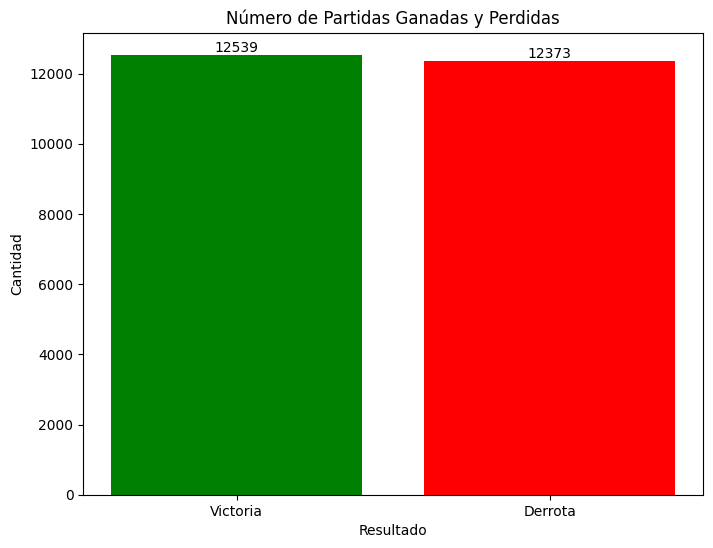

In [7]:
# Agrupar por 'gameId' y sumar las victorias
resultados_por_juego = df.groupby('gameId')['hasWon'].sum().reset_index()

# Determinar si la partida fue ganada o perdida
resultados_por_juego['Resultado'] = resultados_por_juego['hasWon'].apply(lambda x: 'Victoria' if x > 0 else 'Derrota')

# Contar el número de partidas ganadas y perdidas
conteo_resultados = resultados_por_juego['Resultado'].value_counts().reset_index()
conteo_resultados.columns = ['Resultado', 'Cantidad']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(conteo_resultados['Resultado'], conteo_resultados['Cantidad'], color=['green', 'red'])

# Añadir los números encima de las barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2.0, altura, int(altura), ha='center', va='bottom')

plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.title('Número de Partidas Ganadas y Perdidas')
plt.show()

## **Fase 3: Data Preparation**

Para trabajar en la preparación de los datos, se llevará a cabo la limpieza y el procesamiento de acuerdo con las necesidades específicas de cada hípotesis.

### **¿Cómo afectan los objetivos neutrales (Dragones, Barón y Heraldo) a la victoria del equipo?**

In [54]:
#    Selecciona las columnas relevantes del DataFrame.
def columnas_utilizadas(df: pd.DataFrame) -> pd.DataFrame:
    
    # Definir las columnas relevantes
    columns = ['gameId', 'hasWon','frame', 'killedFireDrake', 'killedWaterDrake', 'killedAirDrake', 
               'killedEarthDrake', 'killedElderDrake', 'lostFireDrake', 'lostWaterDrake', 
               'lostAirDrake', 'lostEarthDrake', 'lostElderDrake', 'killedBaronNashor', 
               'lostBaronNashor', 'killedRiftHerald', 'lostRiftHerald']
    
    # Seleccionar las columnas relevantes
    df_relevant = df[columns]
    
    return df_relevant

df_cp = df.copy()

df_usar = columnas_utilizadas(df_cp)

df_usar.head()


,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald
0,4546233126,1,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4546233126,1,12,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,4546233126,1,14,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,4546233126,1,16,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,4546233126,1,18,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [56]:
def seleccion_ultimo_frame(df: pd.DataFrame) -> pd.DataFrame:

    df_last_frame = df.loc[df.groupby('gameId')['frame'].idxmax()]
    
    return df_last_frame





df_ultimo_frame = seleccion_ultimo_frame(df_usar)

# Mostrar el DataFrame resultante
df_ultimo_frame.head()

,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald
186421,4357970300,1,34,0,1,1,1,0,0,0,2,0,0,2,0,1,1
176926,4357978575,0,26,0,0,0,0,0,2,0,1,1,0,0,1,0,2
122571,4358313595,0,24,1,0,1,0,0,0,2,0,0,0,0,1,0,2
233782,4358316661,0,20,0,0,0,0,0,1,1,1,0,0,0,0,1,1
200223,4358361767,1,26,2,0,1,1,0,0,0,0,0,0,1,0,1,0


In [58]:
#    Genera nuevas variables a partir de los objetivos neutrales.

def nuevas_columnas(df: pd.DataFrame) -> pd.DataFrame:
    
    df['totalDragonsKilled'] = (df['killedFireDrake'] + df['killedWaterDrake'] + 
                                df['killedAirDrake'] + df['killedEarthDrake'] +
                                df['killedElderDrake'])
    df['totalDragonsLost'] = (df['lostFireDrake'] + df['lostWaterDrake'] + 
                              df['lostAirDrake'] + df['lostEarthDrake'] + 
                              df['lostElderDrake'])
    df['totalObjectivesKilled'] = (df['killedBaronNashor'] + df['killedRiftHerald'])
    df['totalObjectivesLost'] = (df['lostBaronNashor'] + df['lostRiftHerald'])
    
    return df

df_ncolum = nuevas_columnas(df_ultimo_frame)
df_ncolum.head()

,gameId,hasWon,frame,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,...,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,totalDragonsKilled,totalDragonsLost,totalObjectivesKilled,totalObjectivesLost
186421,4357970300,1,34,0,1,1,1,0,0,0,...,0,0,2,0,1,1,3,2,3,1
176926,4357978575,0,26,0,0,0,0,0,2,0,...,1,0,0,1,0,2,0,4,0,3
122571,4358313595,0,24,1,0,1,0,0,0,2,...,0,0,0,1,0,2,2,2,0,3
233782,4358316661,0,20,0,0,0,0,0,1,1,...,0,0,0,0,1,1,0,3,1,1
200223,4358361767,1,26,2,0,1,1,0,0,0,...,0,0,1,0,1,0,4,0,2,0


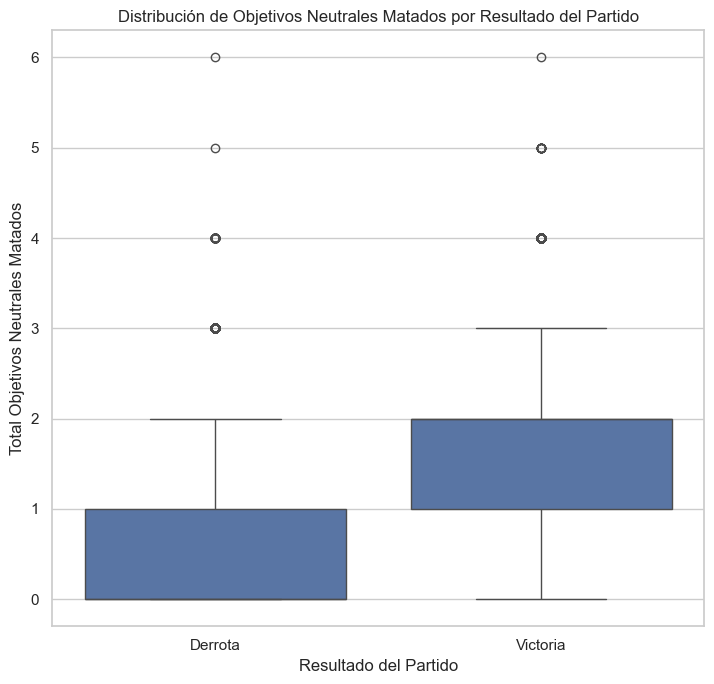

In [59]:
#    Crea un gráfico para visualizar la distribución de objetivos neutrales matados por resultado del partido.

def grafico_wins_neutrales(df: pd.DataFrame) -> None:

    sns.set(style="whitegrid")
    
    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='hasWon', y='totalObjectivesKilled', data=df)
    
    # Personalizar los ejes y el título
    plt.title('Distribución de Objetivos Neutrales Matados por Resultado del Partido')
    plt.xlabel('Resultado del Partido')
    plt.ylabel('Total Objetivos Neutrales Matados')
    
    plt.xticks(ticks=[0, 1], labels=['Derrota', 'Victoria'])
    
    plt.tight_layout()
    plt.show()

grafico_wins_neutrales(df_ultimo_frame)


In [52]:

def calcular_estadisticas(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula el promedio y la desviación estándar para los objetivos neutrales.
    
    Args:
    df (pd.DataFrame): DataFrame con los datos del juego.
    
    Returns:
    pd.DataFrame: DataFrame con las estadísticas calculadas.
    """
    # Lista de columnas de objetivos neutrales
    columnas = ['killedFireDrake', 'killedWaterDrake', 'killedAirDrake',
                'killedEarthDrake', 'killedElderDrake', 'lostFireDrake',
                'lostWaterDrake', 'lostAirDrake', 'lostEarthDrake', 'lostElderDrake',
                'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald','totalObjectivesKilled', 
                'lostRiftHerald']
    
    # Calcular el promedio y la desviación estándar
    estadisticas = {
        'Promedio': df[columnas].mean(),
        'Desviación Estándar': df[columnas].std()
    }
    
    # Crear un DataFrame para las estadísticas
    df_estadisticas = pd.DataFrame(estadisticas)
    
    return df_estadisticas

# Suponiendo que df_with_features es tu DataFrame con datos relevantes
df_estadisticas = calcular_estadisticas(df_ultimo_frame)
print(df_estadisticas)


                       Promedio  Desviación Estándar
killedFireDrake        0.451549             0.647978
killedWaterDrake       0.459136             0.656009
killedAirDrake         0.456487             0.651417
killedEarthDrake       0.461103             0.658937
killedElderDrake       0.025450             0.166413
lostFireDrake          0.462749             0.658301
lostWaterDrake         0.477079             0.663024
lostAirDrake           0.471299             0.661526
lostEarthDrake         0.480170             0.674587
lostElderDrake         0.027015             0.170341
killedBaronNashor      0.428468             0.611155
lostBaronNashor        0.479006             0.639356
killedRiftHerald       0.749037             0.730657
totalObjectivesKilled  1.177505             1.018260
lostRiftHerald         0.869099             0.739101


In [61]:
#    Calcula la correlación entre los objetivos neutrales y el resultado del partido.
def calcular_correlacion_con_victorias(df: pd.DataFrame) -> pd.Series:
    
    # Lista de columnas de objetivos neutrales
    columnas = ['killedFireDrake', 'killedWaterDrake', 'killedAirDrake',
                'killedEarthDrake', 'killedElderDrake', 'lostFireDrake',
                'lostWaterDrake', 'lostAirDrake', 'lostEarthDrake', 'lostElderDrake',
                'killedBaronNashor', 'lostBaronNashor', 'killedRiftHerald','totalObjectivesKilled', 
                'lostRiftHerald']
    
    correlacion = df[columnas + ['hasWon']].corr()['hasWon'].drop('hasWon')
    
    return correlacion

correlacion = calcular_correlacion_con_victorias(df_ultimo_frame)
print(correlacion)


killedFireDrake          0.299475
killedWaterDrake         0.292733
killedAirDrake           0.263026
killedEarthDrake         0.288305
killedElderDrake         0.090164
lostFireDrake           -0.310071
lostWaterDrake          -0.308672
lostAirDrake            -0.271083
lostEarthDrake          -0.301090
lostElderDrake          -0.106398
killedBaronNashor        0.440796
lostBaronNashor         -0.484368
killedRiftHerald         0.322485
totalObjectivesKilled    0.495964
lostRiftHerald          -0.322799
Name: hasWon, dtype: float64


### **Resumen:**

Los datos muestran que existe una relación directa entre la obtención de objetivos neutrales y la victoria en una partida. Matar objetivos clave como el Heraldo de la Grieta y los dragones (fuego, agua, aire y tierra) está fuertemente asociado con una mayor probabilidad de ganar. Por otro lado, la pérdida de estos objetivos tiene un impacto negativo significativo en las posibilidades de victoria.